# Association Rule

**Rule generation** is a common task in the mining of frequent patterns. An association rule is an implication expression of the form X→Y, where X and Y are disjoint itemsets. A more concrete example based on consumer behaviour would be {Bread}→{Milk} suggesting that people who buy Bread are also likely to buy Milk. To evaluate the "interest" of such an association rule, different metrics have been developed. The current implementation make use of the confidence and lift metrics.

**Frequent pattern (itemsets)**: a pattern (a set of items, subsequences, substructures, etc.) that occurs frequently in a data set 


**Apriori** is a popular algorithm for extracting frequent itemsets with applications in association rule learning. The apriori algorithm has been designed to operate on databases containing transactions, such as purchases by customers of a store. An itemset is considered as "frequent" if it meets a user-specified support threshold. For instance, if the support threshold is set to 0.5 (50%), a frequent itemset is defined as a set of items that occur together in at least 50% of all transactions in the database.

- Itemset
   
   A collection of one or more items
   
   Example: {Milk, Bread, Diaper} -> k=2이면, {Milk,Bread}/{Milk,Diaper}/{Bread,Diaper}
- k-itemset

   An itemset that contains k items
   
   k = 2, it means there are two items {Milk, Bread} in an itemset


## Metrics on Association Rule

### 1. Support
The support metric is defined for itemsets, not assocication rules. The table produced by the association rule mining algorithm contains three different support metrics: 'antecedent support', 'consequent support', and 'support'. Here, 'antecedent support' computes the proportion of transactions that contain the antecedent A, and 'consequent support' computes the support for the itemset of the consequent C. The 'support' metric then computes the support of the combined itemset A ∪ C -- note that 'support' depends on 'antecedent support' and 'consequent support' via min('antecedent support', 'consequent support').

Typically, support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database. We refer to an itemset as a "frequent itemset" if you support is larger than a specified minimum-support threshold. Note that in general, due to the downward closure property, all subsets of a frequent itemset are also frequent.

$$support(A \to C) = support(A \cup C), range:[0,1] $$

### 2. Confidence
The confidence of a rule A->C is the probability of seeing the consequent in a transaction given that it also contains the antecedent. Note that the metric is not symmetric or directed; for instance, the confidence for A->C is different than the confidence for C->A. The confidence is 1 (maximal) for a rule A->C if the consequent and antecedent always occur together.

$$confidence (A \to C) = \frac{support(A \to C)}{support (A)}, range: [0,1] $$ 


![](figures/06.01-association_rule.png)

### Example

$$Support(Bread) =  \frac{4}{5} = 0.8$$ 
$$Support(Bread, Milk, Diaper) =  \frac{2}{5} = 0.4$$ 
$$Confidence({Milk, Diaper} \to Beer) =  \frac{support({Milk, Diaper} \to Beer)}{support(Milk, Diaper)}  =\frac{2}{3} = 0.667$$ 

### 3. Lift
The lift metric is commonly used to measure how much more often the antecedent and consequent of a rule A->C occur together than we would expect if they were statistically independent. If A and C are independent, the Lift score will be exactly 1.(less 1 : less relationship / higher than 1 : higher relationship)

$$ lift (A \to C) = \frac{confidence (A \to C)}{support(C)}, range: [0,\infty ] $$

### 4. Leverage
Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

$$ leverage (A \to C) = support(A \to C) - support(A) \times support(C), range: [-1,1]  $$

### 5. Conviction
A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

$$ conviction (A \to C) = \frac{1 - support(C)}{1 - confidence(A \to C)}, range: [0, \infty]  $$

###### 3,4,5 -> 3가지의 independency metric

We will start to analyze the sequence dataset using a package name `mlxtend`. Inside the package, we will use `frequent_patterns` and `preprocessing` library to run some of the classes.

In [1]:
#importing the required packages
import numpy as np
import pandas as pd

In [2]:
!pip install mlxtend
# library for association rule

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth # about frequent pattern
from mlxtend.frequent_patterns import fpmax # about frequent pattern
from mlxtend.preprocessing import TransactionEncoder # row data into transaction format
from mlxtend.frequent_patterns import apriori

Extract the transactional data

In [4]:
df = pd.read_csv('data/RawTransactionDay1.csv')

In [5]:
df.describe()

,No
count,93.000000
mean,11.688172
std,6.307309
min,1.000000
25%,6.000000
50%,12.000000
75%,17.000000
max,22.000000


In [6]:
df.head() # No : transaction ID (1,2,3 ..)-> ID 1에는 6 item, ID 2에는 4 items.... 

,No,Item
0,1,Wine
1,1,Chips
2,1,Bread
3,1,Butter
4,1,Milk


In [7]:
df.dtypes

No       int64
Item    object
dtype: object

To use the association rule, it is recommended to modify the data types into String

In [8]:
df['No'] = df['No'].astype('str')
df['Item'] = df['Item'].astype('str')

In [9]:
df.dtypes
# all is changed to object(object can be string)

No      object
Item    object
dtype: object

The market basket analysis would require the data in the matrix forms

In [14]:
basket = (df.groupby(['No', 'Item'])['Item']
         .count().unstack().reset_index().fillna(0) # not available data : put 0
         .set_index('No')) # set the index as number(number will be index)
# You can do the groupby(by 'stack' / 'unstack')inorder to make data fitted into the transaction format
# this code data is same with current data set , row wise : one data ... 와 같은 데이터(위와 같은)일 경우 이 코드 사용해서 groupby하기

In [15]:
basket.head()
# 1 : buy that item / 0 : didn't buy that item

Item,Apple,Bread,Butter,Chips,Milk,Wine
No,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0
10,0.0,1.0,1.0,0.0,1.0,1.0
11,1.0,1.0,1.0,1.0,0.0,0.0
12,1.0,0.0,1.0,0.0,1.0,1.0
13,0.0,1.0,1.0,1.0,1.0,1.0


For better representation, we can encode the numbers into integer value. 

In [16]:
def encode_unit(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
# real value into the integer value

In [17]:
basket_sets = basket.applymap(encode_unit)
# apply encode_unit into this basket_sets

In [18]:
basket_sets.head()

Item,Apple,Bread,Butter,Chips,Milk,Wine
No,,,,,,
1,1,1,1,1,1,1
10,0,1,1,0,1,1
11,1,1,1,1,0,0
12,1,0,1,0,1,1
13,0,1,1,1,1,1


The representation of the data would be in the binary (0 or 1). Suppose that we want to get the frequent itemsets with apriori algorithm (min support = 0.1)

In [19]:
frequent_itemsets = apriori(basket_sets, min_support = 0.1, use_colnames = True)

In [20]:
frequent_itemsets.shape
# 63 rows

(63, 2)

In [21]:
frequent_itemsets.head()
# support : the number of that item divided by number of transaction

,support,itemsets
0,0.681818,(Apple)
1,0.727273,(Bread)
2,0.681818,(Butter)
3,0.636364,(Chips)
4,0.772727,(Milk)


###### 68% of transaction contains Apple
###### 72% of transaction cotains Bread..

###### 1. Apriori (use 'support')
###### 2. Assocation rule ( use other metrics ex) lift, ...)

The result showed the itemsets where the support is greater than 0.1. From the result of apriori, we could do association rules with metrics such as lift. 

In [22]:
# if you do frequent itemsets, you can do association rule
rules = association_rules(frequent_itemsets, metric='lift', min_threshold = 1) # all the 'lift' are '1'(경계값인 min_threshold가 1이므로)

In [23]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

If someone buy Apple, Bread를 살 확률 -> 첫번째줄(ex)
###### support & confidence : Apple -> Bread

In [24]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple),(Bread),0.681818,0.727273,0.545455,0.800000,1.100000,0.049587,1.363636
1,(Bread),(Apple),0.727273,0.681818,0.545455,0.750000,1.100000,0.049587,1.272727
2,(Butter),(Apple),0.681818,0.681818,0.500000,0.733333,1.075556,0.035124,1.193182
3,(Apple),(Butter),0.681818,0.681818,0.500000,0.733333,1.075556,0.035124,1.193182
4,(Apple),(Chips),0.681818,0.636364,0.454545,0.666667,1.047619,0.020661,1.090909


We could filter the results based on the particular columns. For example, the result should be sorted according to the support.

In [25]:
# generated rules are sorted by some criterias/attributes
rules.sort_values(['confidence'], axis=0, ascending=False, inplace=True) 
# confidence 자리에 support 있었음
# confidence 기준으로  sort
# highest confidence ~ lowest confidence
# ascending=False : 내림차순(큰거부터)
# ascending=True : 오름차순(작은거부터)

In [26]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
438,"(Apple, Wine, Milk, Chips, Butter)",(Bread),0.181818,0.727273,0.181818,1.0,1.375,0.049587,inf
239,"(Butter, Chips, Wine)",(Bread),0.272727,0.727273,0.272727,1.0,1.375,0.074380,inf
364,"(Apple, Milk, Chips, Wine)",(Bread),0.227273,0.727273,0.227273,1.0,1.375,0.061983,inf
308,"(Butter, Apple, Chips, Wine)",(Bread),0.227273,0.727273,0.227273,1.0,1.375,0.061983,inf
412,"(Butter, Milk, Chips, Wine)",(Bread),0.227273,0.727273,0.227273,1.0,1.375,0.061983,inf


In [27]:
rules.sort_values(['support'], axis=0, ascending=False, inplace=True)
# highest one : first, lowest one : last

In [28]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Wine),(Milk),0.727273,0.772727,0.636364,0.875000,1.132353,0.074380,1.818182
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.074380,1.545455
11,(Bread),(Milk),0.727273,0.772727,0.590909,0.812500,1.051471,0.028926,1.212121
13,(Wine),(Bread),0.727273,0.727273,0.590909,0.812500,1.117188,0.061983,1.454545
9,(Bread),(Butter),0.727273,0.681818,0.590909,0.812500,1.191667,0.095041,1.696970


In summary, the total generated rules could be retrieved with .shape

In [29]:
print('total generated rules:', rules.shape)
# 496개, 9columns

total generated rules: (496, 9)


In order to select important rules, we can use "Top-k" rules from a particular metrics. For example, I want to get Top 10 rules using the metric "Support"

#### Get Top-k Rules Data from metric='Support'

In [30]:
rules.nlargest(10,['support'])
# support 큰 10개 (큰 순서대로)
# lift > 1 ; dependent (크면 클수록 높은 dependency)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Wine),(Milk),0.727273,0.772727,0.636364,0.875000,1.132353,0.074380,1.818182
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.074380,1.545455
11,(Bread),(Milk),0.727273,0.772727,0.590909,0.812500,1.051471,0.028926,1.212121
13,(Wine),(Bread),0.727273,0.727273,0.590909,0.812500,1.117188,0.061983,1.454545
9,(Bread),(Butter),0.727273,0.681818,0.590909,0.812500,1.191667,0.095041,1.696970
12,(Bread),(Wine),0.727273,0.727273,0.590909,0.812500,1.117188,0.061983,1.454545
15,(Milk),(Butter),0.772727,0.681818,0.590909,0.764706,1.121569,0.064050,1.352273
8,(Butter),(Bread),0.681818,0.727273,0.590909,0.866667,1.191667,0.095041,2.045455
14,(Butter),(Milk),0.681818,0.772727,0.590909,0.866667,1.121569,0.064050,1.704545
10,(Milk),(Bread),0.772727,0.727273,0.590909,0.764706,1.051471,0.028926,1.159091


In some cases, we could determine the antecedents (factors). For example, if the customer buy Milk, we want to know the items associated with that item (Milk).
#### Filtering Rules from Antecedents

In [31]:
rules[rules['antecedents'] == {'Milk'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.074380,1.545455
15,(Milk),(Butter),0.772727,0.681818,0.590909,0.764706,1.121569,0.064050,1.352273
10,(Milk),(Bread),0.772727,0.727273,0.590909,0.764706,1.051471,0.028926,1.159091
93,(Milk),"(Bread, Wine)",0.772727,0.590909,0.500000,0.647059,1.095023,0.043388,1.159091
76,(Milk),"(Butter, Bread)",0.772727,0.590909,0.500000,0.647059,1.095023,0.043388,1.159091
104,(Milk),"(Butter, Wine)",0.772727,0.500000,0.454545,0.588235,1.176471,0.068182,1.214286
66,(Milk),"(Apple, Wine)",0.772727,0.500000,0.409091,0.529412,1.058824,0.022727,1.062500
261,(Milk),"(Butter, Bread, Wine)",0.772727,0.454545,0.409091,0.529412,1.164706,0.057851,1.159091
53,(Milk),"(Butter, Apple)",0.772727,0.500000,0.409091,0.529412,1.058824,0.022727,1.062500
108,(Milk),"(Chips, Wine)",0.772727,0.409091,0.363636,0.470588,1.150327,0.047521,1.116162


We could also filter based on the consequents. For example, we would like to know the items that follows "Wine" 

#### Filtering Rules from Consequents

In [32]:
rules[rules['consequents'] == {'Wine'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.074380,1.545455
12,(Bread),(Wine),0.727273,0.727273,0.590909,0.812500,1.117188,0.061983,1.454545
90,"(Milk, Bread)",(Wine),0.590909,0.727273,0.500000,0.846154,1.163462,0.070248,1.772727
16,(Butter),(Wine),0.681818,0.727273,0.500000,0.733333,1.008333,0.004132,1.022727
6,(Apple),(Wine),0.681818,0.727273,0.500000,0.733333,1.008333,0.004132,1.022727
36,"(Apple, Bread)",(Wine),0.545455,0.727273,0.454545,0.833333,1.145833,0.057851,1.636364
100,"(Butter, Milk)",(Wine),0.590909,0.727273,0.454545,0.769231,1.057692,0.024793,1.181818
78,"(Butter, Bread)",(Wine),0.590909,0.727273,0.454545,0.769231,1.057692,0.024793,1.181818
64,"(Apple, Milk)",(Wine),0.500000,0.727273,0.409091,0.818182,1.125000,0.045455,1.500000
250,"(Butter, Milk, Bread)",(Wine),0.500000,0.727273,0.409091,0.818182,1.125000,0.045455,1.500000


In addition, we can filter the metrics based on some values. For example, we would like to know the rules which the minimum support is 0.6 and lift is greater than 1.

#### Filtering Rules with Conditions

In [33]:
rules[(rules['support'] >= 0.6) & 
      (rules['lift'] >= 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(Wine),(Milk),0.727273,0.772727,0.636364,0.875000,1.132353,0.07438,1.818182
18,(Milk),(Wine),0.772727,0.727273,0.636364,0.823529,1.132353,0.07438,1.545455


#### Seeing the number of items in one frequent itemsets

In [35]:
#frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets
# length 1 : only 1 item
# ex) support :0.2727... -> 5 items
# you can make condition only item 3 & 5 ...

,support,itemsets,length
0,0.681818,(Apple),1
1,0.727273,(Bread),1
2,0.681818,(Butter),1
3,0.636364,(Chips),1
4,0.772727,(Milk),1
...,...,...,...
58,0.272727,"(Apple, Wine, Milk, Butter, Bread)",5
59,0.227273,"(Apple, Wine, Milk, Chips, Bread)",5
60,0.181818,"(Apple, Wine, Milk, Chips, Butter)",5
61,0.227273,"(Wine, Milk, Chips, Butter, Bread)",5


## Association rules with multiple description of items

In this section, a dataset named `adults` would be used. The dataset contains two csv files. The first csv file contains 15 columns without header. The second csv file is the header name.
The columns are as follows.

- salary: >50K, <=50K.
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [36]:
dataAdult = pd.read_csv('data/adults.csv', header = None)

In [37]:
dataAdult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


To give a header name, we should extract the col_name.csv

In [38]:
col_names = pd.read_csv('data/col_name.csv', header = None)

In [39]:
col_names

,0
0,age
1,workclass
2,fnlwgt
3,education
4,education_num
5,marital_status
6,occupation
7,relationship
8,race
9,sex


Create a list so that the list could be set into the column names.

In [40]:
#col_names.values.tolist()
col_names.stack().tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'salary']

In [41]:
dataAdult.columns = col_names.stack().tolist()

In [42]:
dataAdult.head()
# salary : binary (2 option이므로)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Check all data types

In [43]:
dataAdult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
salary            object
dtype: object

For association rules, only String data is available for the analysis. Converting the continuous data into categorical (String) data would increase the time complexity of the algorithms.

In [44]:
dataAdultStr = dataAdult[['workclass', 'education', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']]
# categorical data only

In [45]:
dataAdultStr.head()

,workclass,education,occupation,relationship,race,sex,native_country,salary
0,State-gov,Bachelors,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [46]:
# <= 50k, >50k is binary

As the package mlxtend requires a list of lists, first we need to convert the data from DataFrame into list

In [47]:
nAdult = dataAdultStr.values.tolist()

In [48]:
# nAdult # list from first, second, third ... person

Once we have the list of lists, we encode the String into binary value by the TransactionEncoder. Note that the apriori algorithms could analyze either boolean or integer data. For this example, let's use integer data.

In [50]:
te = TransactionEncoder()
te_ary = te.fit(nAdult).transform(nAdult)
te_ary.astype("int")
# workclass : false, education : false, ......-> 이게 한 줄

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
# te_ary[:10] -> it becomes true, false, true ......(1 item, 1 data)
# data based on the value

After the transformation into binary values, let's convert the transformation result into DataFrame. With the minimum support = 0.4, we use apriori to get the frequent patterns.

In [51]:
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

frequent_itemsets
# min support 지정
# work class=state.gov : 0 / work class=private : 1
# 76% : <=50k(가장 연관) -> 40% : Husband(그 다음연관).....

,support,itemsets
0,0.760718,( <=50K)
1,0.403669,( Husband)
2,0.668482,( Male)
3,0.694198,( Private)
4,0.897424,( United-States)
5,0.855043,( White)
6,0.465419,"( Male, <=50K)"
7,0.542955,"( Private, <=50K)"
8,0.678473,"( United-States, <=50K)"
9,0.637873,"( White, <=50K)"


Using association rules, we can use any metrics with specific threshold to show the rules.

In [52]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold = 0.6)

In [53]:
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [54]:
rules.head()
# Male은most salary가 <=50k인 사람들 -> support : 46% (그 두 아이템에 대해)
# Male 에 대한 support : 66%, <=50k에 대한 support : 76%, 이 둘에 대한 support : 46%, confidence : 69%(왜냐면 min_threshold:60%이거 보단 높음)
# lift : 0.9(1보다 작음)-> high dependency(괜찮음 왜냐면 높은 confidence)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Male),( <=50K),0.668482,0.760718,0.465419,0.696233,0.915231,-0.043107,0.787714
1,( <=50K),( Male),0.760718,0.668482,0.465419,0.611815,0.915231,-0.043107,0.854021
2,( Private),( <=50K),0.694198,0.760718,0.542955,0.782133,1.028151,0.014866,1.098293
3,( <=50K),( Private),0.760718,0.694198,0.542955,0.713740,1.028151,0.014866,1.068267
4,( United-States),( <=50K),0.897424,0.760718,0.678473,0.756023,0.993828,-0.004214,0.980755


The result shows the first 5 rules with all basic information.

In [56]:
# generated rules are sorted by some criterias/attributes
rules.sort_values(['support'], axis=0, ascending=False, inplace=True)
# resulted by support(support 큰 순으로 나열)
# support 대신 confidence, lift .. 가능

In [57]:
rules.head()
# Many 'White' is in United Stated -> 78% : highest support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,( United-States),( White),0.897424,0.855043,0.788113,0.878194,1.027076,0.020776,1.190066
20,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
4,( United-States),( <=50K),0.897424,0.760718,0.678473,0.756023,0.993828,-0.004214,0.980755
5,( <=50K),( United-States),0.760718,0.897424,0.678473,0.891885,0.993828,-0.004214,0.948767
6,( White),( <=50K),0.855043,0.760718,0.637873,0.746013,0.980669,-0.012574,0.942103


In [58]:
rules.sort_values(['confidence'], axis=0, ascending=False, inplace=True)
rules
# confidence 큰 순으로 나열

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,( Husband),( Male),0.403669,0.668482,0.403648,0.999949,1.495851,0.133803,6536.208018
20,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
53,"( Male, White)",( United-States),0.588326,0.897424,0.541542,0.920480,1.025691,0.013564,1.289939
40,"( White, <=50K)",( United-States),0.637873,0.897424,0.583535,0.914813,1.019376,0.011092,1.204124
59,"( Private, White)",( United-States),0.594243,0.897424,0.543385,0.914416,1.018933,0.010097,1.198533
...,...,...,...,...,...,...,...,...,...
48,( Male),"( Private, United-States)",0.668482,0.617194,0.404427,0.604992,0.980230,-0.008157,0.969110
8,( Male),( Husband),0.668482,0.403669,0.403648,0.603828,1.495851,0.133803,1.505234
58,( United-States),"( Male, White)",0.897424,0.588326,0.541542,0.603440,1.025691,0.013564,1.038115
29,( Male),"( White, <=50K)",0.668482,0.637873,0.402727,0.602450,0.944467,-0.023680,0.910897


By sorting according to the highest Support, we can see the top 5 rules.

#### Get Top-k Rules Data from metric='Support'

In [59]:
rules.nlargest(10,['support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
21,( United-States),( White),0.897424,0.855043,0.788113,0.878194,1.027076,0.020776,1.190066
5,( <=50K),( United-States),0.760718,0.897424,0.678473,0.891885,0.993828,-0.004214,0.948767
4,( United-States),( <=50K),0.897424,0.760718,0.678473,0.756023,0.993828,-0.004214,0.980755
7,( <=50K),( White),0.760718,0.855043,0.637873,0.838514,0.980669,-0.012574,0.897648
6,( White),( <=50K),0.855043,0.760718,0.637873,0.746013,0.980669,-0.012574,0.942103
16,( Private),( United-States),0.694198,0.897424,0.617194,0.889076,0.990697,-0.005796,0.924735
17,( United-States),( Private),0.897424,0.694198,0.617194,0.687740,0.990697,-0.005796,0.979318
12,( Male),( United-States),0.668482,0.897424,0.598317,0.895038,0.997341,-0.001595,0.977267
13,( United-States),( Male),0.897424,0.668482,0.598317,0.666705,0.997341,-0.001595,0.994667


In some cases, we could determine the antecedents (factors). For example, if the person is "White", we want to know the items associated with that race.
#### Filtering Rules from Antecedents

In [60]:
rules[rules['antecedents'] == {' White'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
6,( White),( <=50K),0.855043,0.760718,0.637873,0.746013,0.980669,-0.012574,0.942103
19,( White),( Private),0.855043,0.694198,0.594243,0.694986,1.001135,0.000674,1.002584
15,( White),( Male),0.855043,0.668482,0.588326,0.688066,1.029296,0.016745,1.062781
42,( White),"( United-States, <=50K)",0.855043,0.678473,0.583535,0.682463,1.005879,0.003411,1.012563
63,( White),"( Private, United-States)",0.855043,0.617194,0.543385,0.635506,1.029669,0.015657,1.050239
57,( White),"( Male, United-States)",0.855043,0.598317,0.541542,0.633351,1.058554,0.029955,1.095551


We could also filter based on the consequents. For example, we would like to know the factors that affect the salary <=50K. 

#### Filtering Rules from Consequents

In [61]:
rules[rules['consequents'] == {' <=50K'}]
# <=50k앞에 space 한칸 필요(이 데이터에는 앞에 space 한칸이 포함되어 있기 때문이다)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,( Private),( <=50K),0.694198,0.760718,0.542955,0.782133,1.028151,0.014866,1.098293
30,"( Private, United-States)",( <=50K),0.617194,0.760718,0.478686,0.775585,1.019543,0.009175,1.066245
35,"( Private, White)",( <=50K),0.594243,0.760718,0.456206,0.767709,1.009190,0.004154,1.030097
65,"( Private, White, United-States)",( <=50K),0.543385,0.760718,0.413169,0.760362,0.999531,-0.000194,0.998512
4,( United-States),( <=50K),0.897424,0.760718,0.678473,0.756023,0.993828,-0.004214,0.980755
6,( White),( <=50K),0.855043,0.760718,0.637873,0.746013,0.980669,-0.012574,0.942103
39,"( White, United-States)",( <=50K),0.788113,0.760718,0.583535,0.740420,0.973317,-0.015997,0.921805
0,( Male),( <=50K),0.668482,0.760718,0.465419,0.696233,0.915231,-0.043107,0.787714
22,"( Male, United-States)",( <=50K),0.598317,0.760718,0.412391,0.689252,0.906054,-0.042760,0.770018
26,"( Male, White)",( <=50K),0.588326,0.760718,0.402727,0.684531,0.899848,-0.044823,0.758495


Let suppose we want to know the rules when the consequents is the country name "United States"

In [62]:
rules[rules['consequents'] == {' United-States'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
53,"( Male, White)",( United-States),0.588326,0.897424,0.541542,0.920480,1.025691,0.013564,1.289939
40,"( White, <=50K)",( United-States),0.637873,0.897424,0.583535,0.914813,1.019376,0.011092,1.204124
59,"( Private, White)",( United-States),0.594243,0.897424,0.543385,0.914416,1.018933,0.010097,1.198533
66,"( Private, White, <=50K)",( United-States),0.456206,0.897424,0.413169,0.905664,1.009181,0.003759,1.087341
12,( Male),( United-States),0.668482,0.897424,0.598317,0.895038,0.997341,-0.001595,0.977267
5,( <=50K),( United-States),0.760718,0.897424,0.678473,0.891885,0.993828,-0.004214,0.948767
16,( Private),( United-States),0.694198,0.897424,0.617194,0.889076,0.990697,-0.005796,0.924735
23,"( Male, <=50K)",( United-States),0.465419,0.897424,0.412391,0.886064,0.987341,-0.005287,0.900289
45,"( Private, Male)",( United-States),0.456718,0.897424,0.404427,0.885507,0.986720,-0.005443,0.895910


In addition, we can filter the metrics based on some values. For example, we would like to know the rules which the minimum support is 0.6 and lift is greater than 1.

#### Filtering Rules with Conditions

In [63]:
rules[(rules['support'] >= 0.6) & 
      (rules['lift'] >= 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,( White),( United-States),0.855043,0.897424,0.788113,0.921723,1.027076,0.020776,1.310420
21,( United-States),( White),0.897424,0.855043,0.788113,0.878194,1.027076,0.020776,1.190066


#### Seeing the number of items in one frequent itemsets

In [64]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets
# length : how many item you want to check (length 1 : there is 1 item in dataset)

,support,itemsets,length
0,0.760718,( <=50K),1
1,0.403669,( Husband),1
2,0.668482,( Male),1
3,0.694198,( Private),1
4,0.897424,( United-States),1
5,0.855043,( White),1
6,0.465419,"( Male, <=50K)",2
7,0.542955,"( Private, <=50K)",2
8,0.678473,"( United-States, <=50K)",2
9,0.637873,"( White, <=50K)",2


We can plot the metrics. First, we want to compare between Support and Confidence.

In [65]:
import matplotlib.pyplot as plt

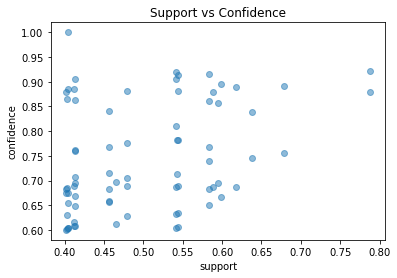

In [66]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()
# high support shows high confidence

Second, we want to compare between Support and Lift

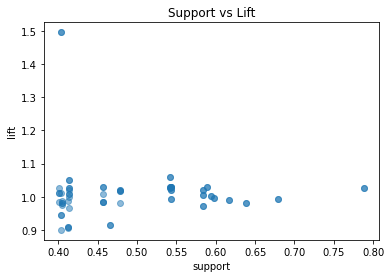

In [67]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()
# there is one data low support but high lift
# there is on data highest support but low lift
# 위 두 data check 하기

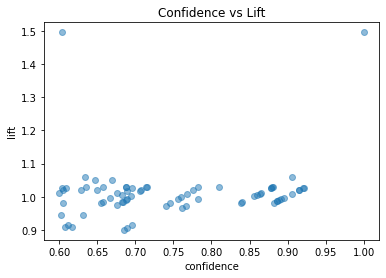

In [68]:
plt.scatter(rules['confidence'], rules['lift'], alpha=0.5)
plt.xlabel('confidence')
plt.ylabel('lift')
plt.title('Confidence vs Lift')
plt.show()
# there is one data low confidence -> high lift
# there is one data high confidence -> high lift
# 위 두 데이터가 있음

# Summary

In this chapter, we learn about Association Rule as one of the approaches to analyze the patterns of data to see the relation of predictors in corresponding to the response. In Association Rule, there are some metrics that we need to understand such as Support, Confidence, Lift. Additional metrics such as Leverage and Conviction could assist the analyst to see a wider view of the results.

Using the `mlxtend` package, this section showed how to transform the transactional data into the encoded structure of the package. First, we performed apriori algorithm. Afterward, using association rule with some parameters, we could extract the important rules according to some conditions such as top-k, antecedents, and consequents. Finally, we can plot all the Support, Confidence, Lift, Leverage, and Conviction into scatter plot to see the most important rules among the list.


References

http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

https://github.com/gbroques/association-analysis/blob/master/Association%20Analysis.ipynb

https://pbpython.com/market-basket-analysis.html